In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [21]:
def clean_df(df):
    df = df[df.caption != '']
    return df.reset_index(drop=True)

In [107]:
rev_dpath = '../data/outputs/reviews/'
        
rev_files = [rev_dpath+ f for f in os.listdir(rev_dpath)]
df_rev = pd.DataFrame()
for file in rev_files:
    
    df = pd.read_json(file)
    df_clean = clean_df(df)
    df_clean['place_id'] = file.split('_',1)[1]
    df_rev = pd.concat((df_rev, df_clean), ignore_index=True)

In [108]:
df_rev['place_id'] = df_rev['place_id'].str.replace('.json','')

In [32]:
rev_dpath = '../data/outputs/cbg_restaurants/'
        
rev_files = [rev_dpath+ f for f in os.listdir(rev_dpath)]
df_rest = pd.DataFrame()
for file in rev_files[:500]:
    
    df = pd.read_json(file)

    df_rest = pd.concat((df_rest, df), ignore_index=True)

In [83]:
short_pl_id = df_rev[df_rev['place_id'].str.len() < 27]['place_id'].to_list()
pl_id_rep = {}
for pl_id in short_pl_id:
    pl_id_rep[pl_id] = (df_rest[df_rest.place_id.str.startswith(pl_id)]['place_id'].unique())[0]

In [84]:
df_rev = df_rev.replace({"place_id": pl_id_rep})

In [113]:
df_join = df_rest.join(df_rev.set_index('place_id'),on = 'place_id',lsuffix='rest_', how='inner')

In [123]:
df_join

,business_status,geometry,icon,name,opening_hours,photos,place_id,plus_code,reference,scope,...,id_review,caption,relative_date,retrieval_date,rating,username,n_review_user,n_photo_user,url_user,census_block_group
1,OPERATIONAL,"{'location': {'lat': 33.5206608, 'lng': -86.80...",https://maps.gstatic.com/mapfiles/place_api/ic...,Restaurants,None,"[{'height': 1280, 'html_attributions': ['<a hr...",ChIJNe0mPMkbiYgR6oApk2Pt7F8,"{'compound_code': 'G5CX+72 Birmingham, AL, USA...",ChIJNe0mPMkbiYgR6oApk2Pt7F8,GOOGLE,...,ChZDSUhNMG9nS0VJQ0FnSUN3a0tYS0N3EAE,Money to pawy secy y QPRyiy,2 years ago,2021-03-23,1,Prathamesh Adhikari,1,0,https://www.google.com/maps/contrib/1146220333...,10730027002
2,OPERATIONAL,"{'location': {'lat': 32.6146592, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,The Cup and Saucer Casseroles Catering & More,{'open_now': False},"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,GOOGLE,...,ChZDSUhNMG9nS0VJQ0FnSUNDdHB6bkdBEAE,Delicious food all the way around! Cup and Sau...,7 months ago,2021-03-23,5,Melissa Atkinson,0,0,https://www.google.com/maps/contrib/1127619209...,10810402004
2,OPERATIONAL,"{'location': {'lat': 32.6146592, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,The Cup and Saucer Casseroles Catering & More,{'open_now': False},"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,GOOGLE,...,ChZDSUhNMG9nS0VJQ0FnSURBMmR2YVpREAE,"Great frozen homemade casseroles, refrigerated...",2 years ago,2021-03-23,5,Tana Branch,0,0,https://www.google.com/maps/contrib/1084704427...,10810402004
3,OPERATIONAL,"{'location': {'lat': 32.6146842, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,Yum Yums Food Specialty Shoppe and Grocery,{'open_now': False},"[{'height': 640, 'html_attributions': ['<a hre...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,GOOGLE,...,ChZDSUhNMG9nS0VJQ0FnSURZamJ5R1JREAE,We had the food for a work event and it was ve...,a year ago,2021-03-23,5,Liv Laugh BTS,6,0,https://www.google.com/maps/contrib/1010388976...,10810402004
3,OPERATIONAL,"{'location': {'lat': 32.6146842, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,Yum Yums Food Specialty Shoppe and Grocery,{'open_now': False},"[{'height': 640, 'html_attributions': ['<a hre...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,GOOGLE,...,ChdDSUhNMG9nS0VJQ0FnSUN3cXV6OThRRRAB,Food is great ad well as service.,2 years ago,2021-03-23,4,Carol Lisenby,0,0,https://www.google.com/maps/contrib/1171812312...,10810402004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,OPERATIONAL,"{'location': {'lat': 41.933, 'lng': -87.640266...",https://maps.gstatic.com/mapfiles/place_api/ic...,Duffy's Tavern and Grille,{'open_now': False},"[{'height': 3036, 'html_attributions': ['<a hr...",ChIJhxWqHATND4gRW4vPUI6hlMs,"{'compound_code': 'W9M5+5V Chicago, IL, USA', ...",ChIJhxWqHATND4gRW4vPUI6hlMs,GOOGLE,...,ChdDSUhNMG9nS0VJQ0FnSURBeTdmZ3VRRRAB,"Good food, multiple screens, above average sp...",3 years ago,2021-03-27,3,paris tyler,183,0,https://www.google.com/maps/contrib/1022764572...,170310633023
3411,OPERATIONAL,"{'location': {'lat': 41.933, 'lng': -87.640266...",https://maps.gstatic.com/mapfiles/place_api/ic...,Duffy's Tavern and Grille,{'open_now': False},"[{'height': 3036, 'html_attributions': ['<a hr...",ChIJhxWqHATND4gRW4vPUI6hlMs,"{'compound_code': 'W9M5+5V Chicago, IL, USA', ...",ChIJhxWqHATND4gRW4vPUI6hlMs,GOOGLE,...,ChdDSUhNMG9nS0VJQ0FnSUN3ODZXbG1nRRAB,Bartenders will get drunk with you if you're b...,3 years ago,2021-03-27,4,Michael Saucier,0,0,https://www.google.com/maps/contrib/1077513477...,170310633023


In [129]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382994 entries, 1 to 3411
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business_status     382994 non-null  object 
 1   geometry            382994 non-null  object 
 2   icon                382994 non-null  object 
 3   name                382994 non-null  object 
 4   opening_hours       353630 non-null  object 
 5   photos              382181 non-null  object 
 6   place_id            382994 non-null  object 
 7   plus_code           382934 non-null  object 
 8   reference           382994 non-null  object 
 9   scope               382994 non-null  object 
 10  types               382994 non-null  object 
 11  vicinity            382994 non-null  object 
 12  ratingrest_         382524 non-null  float64
 13  user_ratings_total  382524 non-null  float64
 14  CBG                 382994 non-null  int64  
 15  Radius              382994 non-null 

<AxesSubplot:>

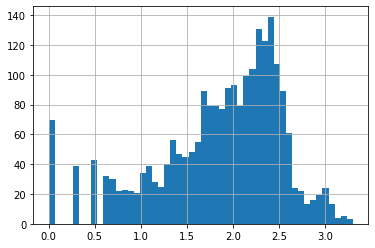

In [128]:
np.log10(df_join['place_id'].value_counts()).hist(bins=50)

In [121]:
df_join[['rating','price_level']].corr()

,rating,price_level
rating,1.000000,0.086009
price_level,0.086009,1.000000


In [89]:
df_rest[df_rest.place_id=='ChIJI2sEInZyAHwRZPwNJF9HxFc']

,business_status,geometry,icon,name,opening_hours,photos,place_id,plus_code,reference,scope,types,vicinity,rating,user_ratings_total,CBG,Radius,price_level,permanently_closed
2345,OPERATIONAL,"{'location': {'lat': 21.2796528, 'lng': -157.8...",https://maps.gstatic.com/mapfiles/place_api/ic...,Surf N Turf Tacos,{'open_now': False},"[{'height': 1536, 'html_attributions': ['<a hr...",ChIJI2sEInZyAHwRZPwNJF9HxFc,"{'compound_code': '75HF+VM Honolulu, HI, USA',...",ChIJI2sEInZyAHwRZPwNJF9HxFc,GOOGLE,"[restaurant, food, point_of_interest, establis...","2310 Kūhiō Avenue, Honolulu",4.2,918.0,150030020031,139.723233,1.0,NaN
2409,OPERATIONAL,"{'location': {'lat': 21.2796528, 'lng': -157.8...",https://maps.gstatic.com/mapfiles/place_api/ic...,Surf N Turf Tacos,{'open_now': False},"[{'height': 1536, 'html_attributions': ['<a hr...",ChIJI2sEInZyAHwRZPwNJF9HxFc,"{'compound_code': '75HF+VM Honolulu, HI, USA',...",ChIJI2sEInZyAHwRZPwNJF9HxFc,GOOGLE,"[restaurant, food, point_of_interest, establis...","2310 Kūhiō Avenue, Honolulu",4.2,918.0,150030020041,203.066715,1.0,NaN
